In [15]:
from src.Slm import slm
import numpy as np
import matplotlib.pyplot as plt

**Error Classification**

Valid!


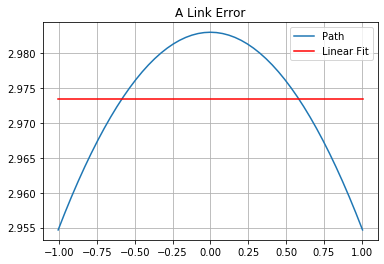

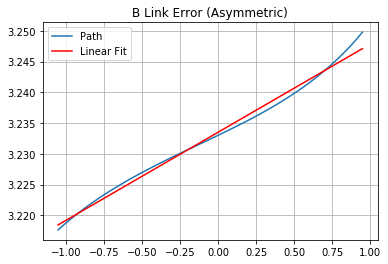

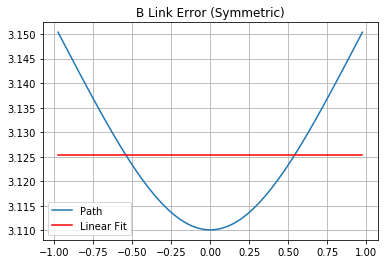

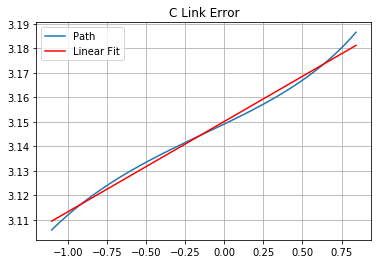

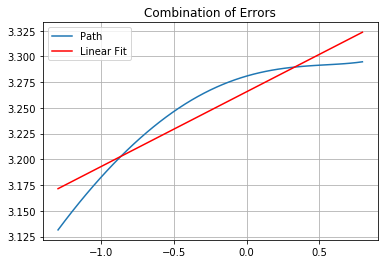

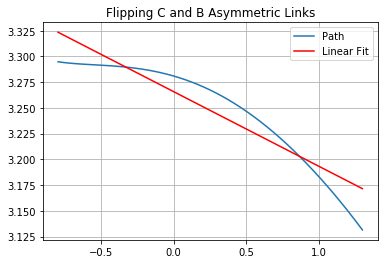

In [2]:
# SLM Constants
A = np.array([1,1.2])
B = np.array([1,1,1,1])
C = np.array([2.75,2.75])
MAX_THETA = 0.6
theta_range = [-MAX_THETA,MAX_THETA]
SLM = slm.mechanism(A,B,C,theta_range,add_noise = True)
SLM.plot_path("A Link Error")

# Symetric Error in B link
A = np.array([1,1])
B = np.array([1.1,1,1.1,1])
SLM.update_links(A,B,C)
SLM.path()
SLM.plot_path("B Link Error (Asymmetric)")

# Anti-Symetric B Link Error
B = np.array([1,1,.9,.9])
SLM.update_links(A,B,C)
SLM.path()
SLM.plot_path("B Link Error (Symmetric)")

# C Link Error
B = np.array([1,1,1,1])
C = np.array([2.65,2.75])
SLM.update_links(A,B,C)
SLM.path()
SLM.plot_path("C Link Error")

# Combination of Errors
A = np.array([1,1.1])
B = np.array([1.03,.9,1.1,1.1])
C = np.array([2.65,2.75])
SLM.update_links(A,B,C)
SLM.path()
SLM.plot_path("Combination of Errors")

# Flip C
A = np.array([1,1.1])
B = np.array([.9,1.03,1.1,1.1])
C = np.array([2.75,2.65])
SLM.update_links(A,B,C)
SLM.path()
SLM.plot_path("Flipping C and B Asymmetric Links")

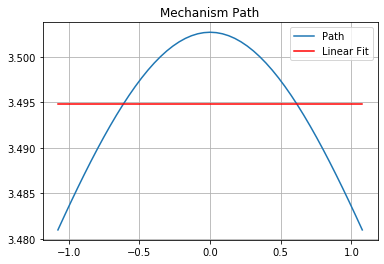

[0.9 0.9 1.  1. ]
[1.  1.  0.9 0.9]


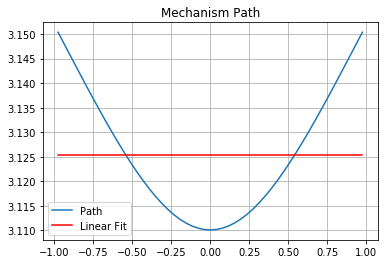

In [3]:
# Combination of Errors
A = np.array([1,1])
B = np.array([.9,.9,1,1])
C = np.array([2.75,2.75])
SLM.update_links(A,B,C)
SLM.path()
SLM.plot_path()
print(SLM.B)
SLM.swap_symmetric()
print(SLM.B)
SLM.path()
SLM.plot_path()

# (path_x,path_y) = SLM.path()
# print(path_y[0],path_y[-1])
# SLM.plot_path("Combination of Errors")
# A = np.array([1,1.1])
# B = np.array([1.1,1.1,1,1])
# SLM.update_links(A,B,C)
# (path_x,path_y) = SLM.path()
# print(path_y[0],path_y[-1])
# SLM.plot_path("Combination of Errors")
# A = np.array([1,.9])
# B = np.array([.95,.95,1,1])
# SLM.update_links(A,B,C)
# (path_x,path_y) = SLM.path()
# print(path_y[0],path_y[-1])
# SLM.plot_path("Combination of Errors")


**Minimize Error Through Self Referncing** 

Valid!
Valid!


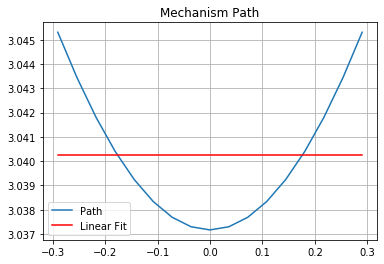

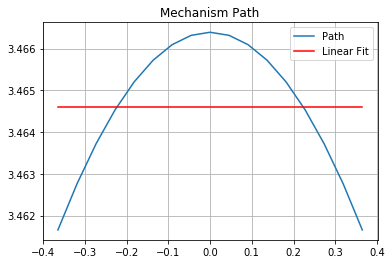

[1.05 0.95] [1.05 1.05 0.95 0.95] [2.75 2.75]
[0.95 1.05] [0.95 0.95 1.05 1.05] [2.75 2.75]
1.2752333594296095
1.270293604633254
1.2653582816697981
1.2604273594518995
1.2555008072093066
1.2505785944848025
1.245660691130077
1.240747067301836
1.235837693457864
1.2309325403532227
1.2260315790365004
1.221134780846214
1.2162421174071434
1.2113535606268149
1.2064690826921654
1.2015886560660083
1.1967122534838728
1.1918398479506618
1.1869714127375035
1.1821069213787059
1.1772463476685933
1.1723896656586335
1.1675368496544771
1.162687874213069
1.1578427141398802
1.153001344486189
1.1481637405463547
1.1433298778552063
1.138499732185497
1.133673279545374
1.128850496175945
1.1240313585488284
1.1192158433638566
1.1144039275467512
1.1095955882469237
1.1047908028352116
1.0999895489018399
1.0951918042542308
1.0903975469150324
1.085606755120156
1.0808194073167567
1.0760354821614118
1.0712549585182751
1.066477815457259
1.0617040322523408
1.0569335883798137
1.0521664635167012
1.0474026375390872
1.042642

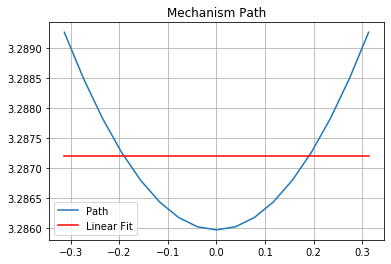

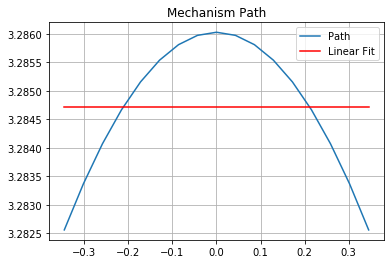

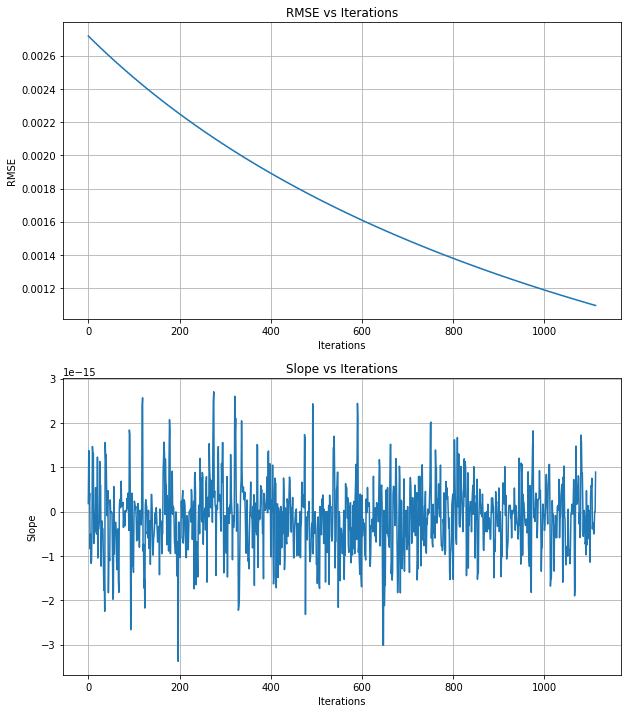

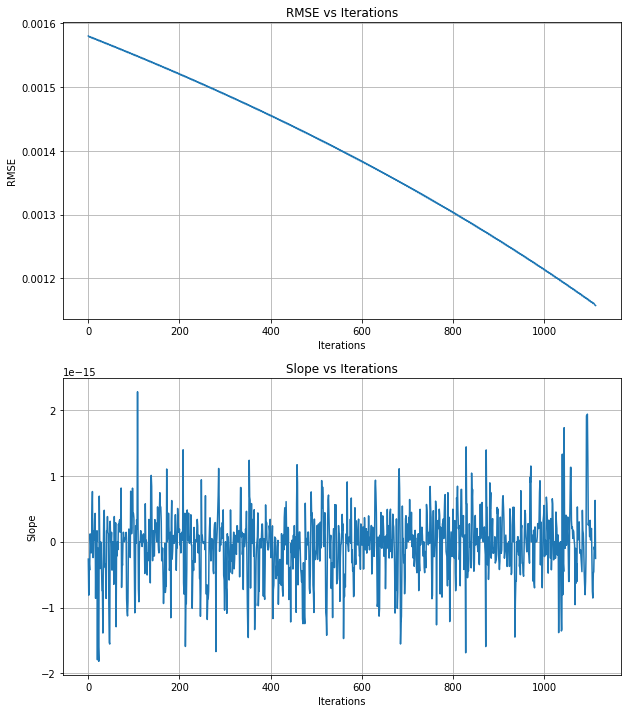

0.0001
[1.0222 0.9221] [1.0222 1.0222 0.9778 0.9778] [2.75 2.75]
[0.9779 1.0777] [0.9778 0.9778 1.0222 1.0222] [2.75 2.75]


In [19]:
# Returns eucledian distance between two points
def distance(p1,p2):
    return(((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)**0.5)

# Error defined as sum of distances between points at left/right extrema and origin
def simple_error(SLM_R1,SLM_R2):
    origin = int(len(SLM_R1.path_list)/2)
    e0 = distance(SLM_R1.path_list[origin],SLM_R2.path_list[origin])
    e1 = distance(SLM_R1.path_list[0],SLM_R2.path_list[0])
    e2 = distance(SLM_R1.path_list[-1],SLM_R2.path_list[-1])
    return(e0 + e1 + e2)

# Finds optimal changes to a link group using the simple error function 
def find_optimal(SLM_Del,SLM_Ref,del_list,dGroup,E0):
    change_found = False
    for delta in del_list:
        apply_delta = {dGroup: delta} # create dictionary to pack into kwargs
        SLM_Del.update_links(**apply_delta)
        SLM_Del.path()
        E = simple_error(SLM_Del,SLM_Ref)
        if E < E0:
            E0 = E
            change_found = True
            SLM_Del.save_error()
        else:
            # Take two steps back
            apply_delta = {dGroup: -2*delta} # create dictionary to pack into kwarg
            SLM_Del.update_links(**apply_delta)
            SLM_Del.path()
            E = simple_error(SLM_Del,SLM_Ref)
            if E < E0:
                E0 = E
                change_found = True
                SLM_Del.save_error()
            # Revert back to original value
            else:
                apply_delta = {dGroup: delta} # create dictionary to pack into kwarg
                SLM_Del.update_links(**apply_delta)
                SLM_Del.path()
    return(change_found,E)

def self_reference():
    # SLM 1 Constants
    A1 = np.array([1,1])
    B1 = np.array([1,1,1,1])
    C1 = np.array([2.75,2.75])
    # SLM 2 Constants
    A2 = np.array([1,1])
    B2 = np.array([1,1,1,1])
    C2 = np.array([2.75,2.75])
    # Simulation constants
    MAX_NOISE = 0.05
    STEP_SIZE = MAX_NOISE/500
    theta_range = [-0.2,0.2]
    # Simple set error
    E1_A = np.array([0.05,-0.05])
    E2_A = np.array([-0.05,0.05])
    E1_B = np.array([0.05,0.05,-0.05,-0.05])
    E2_B = np.array([-0.05,-0.05,0.05,0.05])
    # Generate mechanisms with aribtrary noise
    SLM_R1 = slm.mechanism(A1+E1_A,B1+E1_B,C1,theta_range)
    SLM_R2 = slm.mechanism(A2+E2_A,B2+E2_B,C2,theta_range)
    SLM_R1.path()
    SLM_R2.path()
    SLM_R1.plot_path()
    SLM_R2.plot_path()
    E0 = simple_error(SLM_R1,SLM_R2)
    # Delta arrays
    delA = STEP_SIZE*np.array([[0,1],[1,0]])
    delB = STEP_SIZE*np.array([[1,1,0,0],[0,0,1,1]])
    optimal_found = False
    found_better = False
    print(SLM_R1.A,SLM_R1.B,SLM_R1.C)
    print(SLM_R2.A,SLM_R2.B,SLM_R2.C)
    while not optimal_found:
        print(E0)
        # Test R1_A changes
        (change_found,E) = find_optimal(SLM_R1,SLM_R2,delA,"dA",E0)
        if change_found: E0,found_better = E,True
        # Test R2_A changes
        (change_found,E) = find_optimal(SLM_R2,SLM_R1,delA,"dA",E0)
        if change_found: E0,found_better = E,True
        # Test R1_Bs changes
        (change_found,E) = find_optimal(SLM_R1,SLM_R2,delB,"dB",E0)
        if change_found: E0,found_better = E,True
        # Test R2_Bs changes
        (change_found,E) = find_optimal(SLM_R2,SLM_R1,delB,"dB",E0)
        if change_found: E0,found_better = E,True
        # Test termination conditions
        if not found_better:
            optimal_found = True
        found_better = False
    SLM_R1.path()
    SLM_R2.path()
    SLM_R1.plot_path()
    SLM_R2.plot_path()
    SLM_R1.plot_error()
    SLM_R2.plot_error()
    print(STEP_SIZE)
    print(SLM_R1.A,SLM_R1.B,SLM_R1.C)
    print(SLM_R2.A,SLM_R2.B,SLM_R2.C)

self_reference()

**Error as Function of Scale**

Valid!
Errors [0.00820176 0.07372259] [-0.07136327  0.01833056 -0.02312838  0.00191222] [-0.05451011  0.00998009]
Checking errors [0.00820176 0.07372259] [-0.07136327  0.01833056 -0.02312838  0.00191222] [-0.05451011  0.00998009]
Current [19.99820176 20.06372259] [19.91863673 20.00833056 19.96687162 19.99191222] [54.91798989 54.98248009]
Starting [1 1] [1 1 1 1] [2.75 2.75]


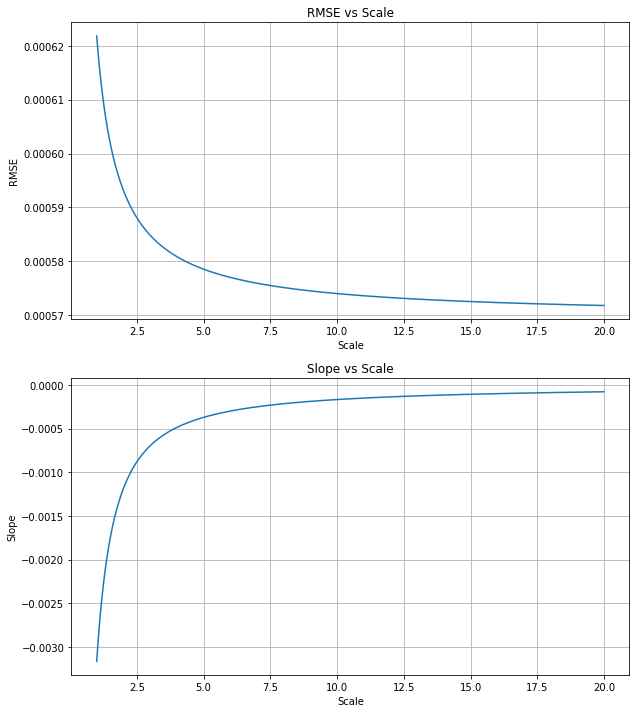

In [5]:
def scale_up_error():
    # SLM Constants
    A0 = np.array([1,1])
    B0 = np.array([1,1,1,1])
    C0 = np.array([2.75,2.75])
    MAX_ERROR = 0.1
    A_error = np.random.uniform(low=-MAX_ERROR, high=MAX_ERROR, size=(len(A0),))
    B_error = np.random.uniform(low=-MAX_ERROR, high=MAX_ERROR, size=(len(B0),))
    C_error = np.random.uniform(low=-MAX_ERROR, high=MAX_ERROR, size=(len(C0),))
    theta_range = [-0.2,0.2]
    SLM = slm.mechanism(A0+A_error,B0+B_error,C0+C_error,theta_range)
    # scaling constants
    MAX_SCALE = 20
    STEP_SIZE = 0.01
    # scale mechanism up and record error in path
    scale_range=np.arange(1,MAX_SCALE,STEP_SIZE)
    for s_factor in scale_range:
        A,B,C = A0*s_factor+A_error,B0*s_factor+B_error,C0*s_factor+C_error    
        SLM.update_links(A,B,C)
        SLM.path()
    print("Errors",A_error,B_error,C_error)
    print("Checking errors",A-A0*s_factor,B-B0*s_factor,C-C0*s_factor)
    print("Current",A,B,C)
    print("Starting",A0,B0,C0)
    SLM.plot_error(Scale=scale_range)
scale_up_error()